<a href="https://colab.research.google.com/github/AayushiC/COMPUTATIONAL-STUDY-OF-ELECTRONIC-PROPERTIES-OF-MATERIALS/blob/main/2D_Tight_Binding_Model_Square_Lattice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
Lx = int(input("Total length of chain in x direction: "))
Ly = int(input("Total length of chain in y direction: "))
Nx = int(input("Number of atoms in x direction: "))
Ny = int(input("Number of atoms in y direction: "))
e = float(input("On-site parameter: "))
t = float(input("Hopping parameter: "))

Total length of chain in x direction: 40
Total length of chain in y direction: 40
Number of atoms in x direction: 40
Number of atoms in y direction: 40
On-site parameter: 0
Hopping parameter: 1


In [ ]:
# Constructing the Hamiltonian

POS = np.zeros((Nx,Ny),int)
Nlist = np.zeros((Nx*Ny,4),int)

count = 0
for i in range(Nx):
  for j in range(Ny):
    POS[i,j] = count
    count+=1

count = 0
for i in range(Nx):
  for j in range(Ny):
    Nlist[count,0] = POS[(i+Nx-1)%Nx,j]
    Nlist[count,1] = POS[(i+Nx+1)%Nx,j]
    Nlist[count,2] = POS[i,(j+Ny-1)%Ny]
    Nlist[count,3] = POS[i,(j+Ny+1)%Ny]
    count+=1

count = 0
H = np.zeros((Nx*Ny,Nx*Ny))
for i in range(Nx*Ny):
  for j in range(Nx*Ny):
    if i==j:
      H[i,j] = e
    elif j in Nlist[i]:
      H[i,j] = t

In [ ]:
# Determining Eigen Values and Eigen Vectors from the Hamiltonian Matrix

E,W = np.linalg.eig(H)

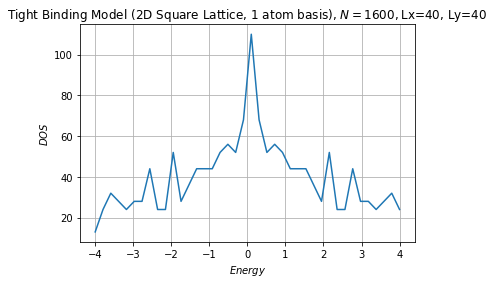

In [ ]:
# Plotting Density of States vs Energy

_E = np.real(np.sort(E))
ene = np.linspace(-4.0*t,4.0*t,Lx)
DOS = np.zeros(Lx)
de = 8.0*t/Lx
for i in range(Lx):
  eh = -4.0*t + i*de + de/2.0
  el = -4.0*t + i*de - de/2.0
  s = 0
  for j in range(Nx*Ny):
    if _E[j] >= el and _E[j] <=eh:
      s += 1
  DOS[i] = s

fig, ax = plt.subplots()
ax.set_title('Tight Binding Model (2D Square Lattice, 1 atom basis), $N='+str(Nx*Ny)+', $Lx='+str(Lx)+', Ly='+str(Ly))
ax.set_ylabel('$DOS$')
ax.set_xlabel('$Energy$')
ax.plot(ene,DOS)
ax.grid(True)